In [145]:
import pandas as pd
import stldecompose
from stldecompose.forecast_funcs import drift,mean
from statsmodels.tsa.stattools import adfuller
from pandas import read_csv
from pandas import datetime
from pandas import *
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
import numpy
import pandas as pd
from statsmodels.tsa.vector_ar.var_model import VAR
import datetime
import matplotlib.pyplot as plt
import psycopg2
import random


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [116]:
e_commerce = pd.read_csv('malaysia_data/e_commerce/transaction.csv')

In [117]:
e_commerce.head()

,Deal ID,Deal Title,Business Group ID,Business Group Name,category,Package ID,Package Title,Order ID,Order Full Date,Order Date,...,Order Week,weekday,Return Member Flag,Discount Rate (%),Gross Profit,Gross Profit per Unit,No of Order,Campaign Title,Promo Code,Discount Amount
0,5ac6f000a3d12600015f29c7,RM17.99 for RM20 Inside Scoop Cash Voucher,5ac6ee8cf6dae60001d22016,Inside Scoop,Food & Beverage,5b694c2aa3d1260001c81589,RM17.99 for RM20 Inside Scoop Cash Voucher,MYO-18090003602,2018-09-08 05:58:53.000000,2018-09-08,...,2018-09-02,(7) Saturday,Return Member,89.950000,0.99,0.99,1,Celebr8 September - General,MUNKICK28,5
1,5b179e2f3bc1260001bb345c,RM5.50 for RM6.90 ForeverTea Drink Voucher (Re...,59379afefab61d00018f87ef,ForeverTea,Food & Beverage,5b17a28da3d1260001ff5b34,RM5.50 for RM6.90 ForeverTea Drink Voucher (Re...,MYO-18060004862,2018-06-08 20:35:38.000000,2018-06-08,...,2018-06-03,(6) Friday,New Member,79.710145,0.50,0.50,1,Celebr8 June ForeverTea,TEA35,2
2,5b179e2f3bc1260001bb345c,RM5.50 for RM6.90 ForeverTea Drink Voucher (Re...,59379afefab61d00018f87ef,ForeverTea,Food & Beverage,5b17a28da3d1260001ff5b34,RM5.50 for RM6.90 ForeverTea Drink Voucher (Re...,MYO-18060004855,2018-06-08 20:35:22.000000,2018-06-08,...,2018-06-03,(6) Friday,Return Member,79.710145,0.50,0.50,1,Celebr8 June ForeverTea,TEA35,2
3,5b179e2f3bc1260001bb345c,RM5.50 for RM6.90 ForeverTea Drink Voucher (Re...,59379afefab61d00018f87ef,ForeverTea,Food & Beverage,5b17a28da3d1260001ff5b34,RM5.50 for RM6.90 ForeverTea Drink Voucher (Re...,MYO-18060004846,2018-06-08 20:34:57.000000,2018-06-08,...,2018-06-03,(6) Friday,New Member,79.710145,0.50,0.50,1,Celebr8 June ForeverTea,TEA35,2
4,5aa0a3d3a3d12600015e22ea,mydinRM50 | RM100 | RM200 Mydin Cash Voucher,59a6c34c7dbc9e0001d56951,Mydin,Shopping,5aa0ae7b3bc126000181152e,RM100 Cash Voucher,MYO-18060004859,2018-06-08 20:35:28.000000,2018-06-08,...,2018-06-03,(6) Friday,Return Member,100.000000,0.00,0.00,1,Celebr8 June MYDIN 100,MY30,30


In [118]:
e_commerce.columns

Index(['Deal ID', 'Deal Title', 'Business Group ID', 'Business Group Name',
       'category', 'Package ID', 'Package Title', 'Order ID',
       'Order Full Date', 'Order Date', 'Order Hour', 'User Profile ID',
       'Original Price', 'Selling Price', 'quantity', 'Total Amount',
       'Total Payment', 'Unit Price', 'Point Used', 'Point Deducted',
       'Point Awarded', 'currency', 'platform', 'Payment Type',
       'Payment Type Info', 'Signup Date', 'Turnaround Sales Date',
       'New Signup', 'Time Taken', 'Order Week', 'weekday',
       'Return Member Flag', 'Discount Rate (%)', 'Gross Profit',
       'Gross Profit per Unit', 'No of Order', 'Campaign Title', 'Promo Code',
       'Discount Amount'],
      dtype='object')

In [121]:
groups = e_commerce.groupby(['Order Date']).sum()

In [122]:
groups = groups[['Original Price', 'Selling Price', 'Total Amount', 'Total Payment','quantity', 'Point Used', 'Unit Price', 'Time Taken', 'Gross Profit', 'No of Order']]
groups.head()

,quantity,Point Used,Unit Price,Time Taken,Gross Profit,No of Order
Order Date,,,,,,
2018-06-08,3935,864795,98096,238287.178,1858.58,3683
2018-06-14,192,20730,4570,6385.608,462.50,80
2018-06-15,49,7159,558,3138.238,60.67,32
2018-06-16,352,35358,5696,18394.650,325.87,188
2018-06-17,100,12281,980,5069.970,60.66,60


In [123]:
groups.to_csv('ecommerce_timeseries.csv')

In [124]:
ecom = pd.read_csv('msia_data_preprocessed/ecommerce_timeseries.csv')

In [125]:
ecom.head()

,Order Date,quantity,Point Used,Unit Price,Time Taken,Gross Profit,No of Order
0,2018-06-08,3935,864795,98096,238287.178,1858.58,3683
1,2018-06-14,192,20730,4570,6385.608,462.50,80
2,2018-06-15,49,7159,558,3138.238,60.67,32
3,2018-06-16,352,35358,5696,18394.650,325.87,188
4,2018-06-17,100,12281,980,5069.970,60.66,60


In [126]:
len(ecom['Order Date'].unique())

76

In [127]:
ecom['Order Date'] = pd.to_datetime(ecom['Order Date'], format='%Y-%m-%d')
ecom.head()

,Order Date,quantity,Point Used,Unit Price,Time Taken,Gross Profit,No of Order
0,2018-06-08,3935,864795,98096,238287.178,1858.58,3683
1,2018-06-14,192,20730,4570,6385.608,462.50,80
2,2018-06-15,49,7159,558,3138.238,60.67,32
3,2018-06-16,352,35358,5696,18394.650,325.87,188
4,2018-06-17,100,12281,980,5069.970,60.66,60


In [128]:
## Fill in missing values with 0
r_range = pd.date_range(start=ecom['Order Date'].min(), end=ecom['Order Date'].max())

ecom_fill = ecom.set_index('Order Date').reindex(r_range).fillna(method='ffill').rename_axis('dt').reset_index()

In [129]:
ecom_fill.head()

,dt,quantity,Point Used,Unit Price,Time Taken,Gross Profit,No of Order
0,2018-06-08,3935.0,864795.0,98096.0,238287.178,1858.58,3683.0
1,2018-06-09,3935.0,864795.0,98096.0,238287.178,1858.58,3683.0
2,2018-06-10,3935.0,864795.0,98096.0,238287.178,1858.58,3683.0
3,2018-06-11,3935.0,864795.0,98096.0,238287.178,1858.58,3683.0
4,2018-06-12,3935.0,864795.0,98096.0,238287.178,1858.58,3683.0


In [130]:
ecom_fill = ecom_fill.set_index('dt')

In [131]:
ecom_fill = ecom_fill[ecom_fill['Gross Profit'] < 1000]
ecom_fill = ecom_fill.abs()

In [180]:
result_array = []
last_date = pd.to_datetime(ecom_fill.tail(1).index.item())
print(pd.to_datetime(last_date))
#print(name, ecom_fill)
#creating the train and validation set
train = ecom_fill[:int(0.8*(len(ecom_fill)))]
valid = ecom_fill[int(0.8*(len(ecom_fill))):]
cols = ecom_fill.columns
#fit theecom_fillmodel


model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,6):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
#for i in cols:
    #print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))
#print(sqrt(mean_squared_error(pred[1], valid[1])))
rmse_error_val = sqrt(mean_squared_error(pred['Gross Profit'], valid['Gross Profit']))

#make final predictions
model = VAR(endog=ecom_fill)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=30)
#print(train)
for i in range(len(train)):
    result_array.append((train.iloc[i].name, train.iloc[i]['Gross Profit'], train.iloc[i]['No of Order'], 'actual'))

    
    
for i in range(len(yhat)):
    result_array.append((last_date + pd.DateOffset(days=i),yhat[i][4] + random.randint(-100,100), yhat[i][5] + random.randint(-100,100),'predicted'))


for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

2018-09-28 00:00:00
rmse value for quantity is :  301.8526949813261
rmse value for Point Used is :  63498.764161978244
rmse value for Unit Price is :  2549.989010475215
rmse value for Time Taken is :  11596.767766547116
rmse value for Gross Profit is :  334.7759970821084
rmse value for No of Order is :  170.61867606379346


C:\Users\AC408\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\AC408\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [143]:
result_array

[(Timestamp('2018-06-14 00:00:00'), 462.4999999999996, 80.0, 'actual'),
 (Timestamp('2018-06-15 00:00:00'), 60.66999999999998, 32.0, 'actual'),
 (Timestamp('2018-06-16 00:00:00'), 325.8700000000002, 188.0, 'actual'),
 (Timestamp('2018-06-17 00:00:00'), 60.66, 60.0, 'actual'),
 (Timestamp('2018-06-18 00:00:00'), 144.98000000000005, 38.0, 'actual'),
 (Timestamp('2018-06-19 00:00:00'), 142.53, 93.0, 'actual'),
 (Timestamp('2018-06-20 00:00:00'), 123.15, 44.0, 'actual'),
 (Timestamp('2018-06-21 00:00:00'), 145.74999999999994, 115.0, 'actual'),
 (Timestamp('2018-06-22 00:00:00'), 148.01999999999995, 116.0, 'actual'),
 (Timestamp('2018-06-23 00:00:00'), 60.24999999999997, 80.0, 'actual'),
 (Timestamp('2018-06-24 00:00:00'), 211.71, 64.0, 'actual'),
 (Timestamp('2018-06-25 00:00:00'), 85.99000000000002, 33.0, 'actual'),
 (Timestamp('2018-06-26 00:00:00'), 453.19, 162.0, 'actual'),
 (Timestamp('2018-06-27 00:00:00'), 314.36999999999995, 207.0, 'actual'),
 (Timestamp('2018-06-28 00:00:00'), 322

In [144]:
### Save Results to array

connection = psycopg2.connect(user='o1',
                              password='601111444097',
                              host='hackaton-db.fusionexgiant.com',
                              port='35432',
                              database='o1')

postgres_insert_query = """INSERT INTO ecommerce_prediction_multivar_simulated (timestamp, gross_profit, no_of_order, value_type) VALUES (%s, %s, %s, %s)"""
cursor = connection.cursor()
for element in result_array:
    cursor.execute(postgres_insert_query, element)
    connection.commit()


Host            : hackaton-db.fusionexgiant.com
Port            : 35432
Database        : o1
Username        : o1
Password        : 601111444097

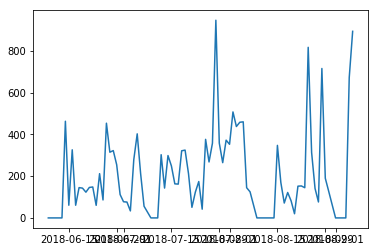

In [107]:
plt.plot(train['Gross Profit'])

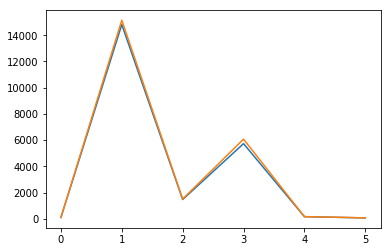

In [112]:
plt.plot(yhat[4])

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


#dataset = pd.read_csv('malaysia_data/e_commerce/transaction.csv')
#print(dataset.columns)
X_train,y_train,X_test,y_test = train_test_split(ecom_fill.iloc[:,0:4],ecom_fill['Gross Profit'],test_size=0.3)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

ValueError: Unknown label type: 'continuous-multioutput'

In [176]:
ecom_fill.columns

Index(['quantity', 'Point Used', 'Unit Price', 'Time Taken', 'Gross Profit',
       'No of Order'],
      dtype='object')

In [178]:
ecom_fill.head()


,quantity,Point Used,Unit Price,Time Taken,Gross Profit,No of Order
dt,,,,,,
2018-06-14,192.0,20730.0,4570.0,6385.608,462.50,80.0
2018-06-15,49.0,7159.0,558.0,3138.238,60.67,32.0
2018-06-16,352.0,35358.0,5696.0,18394.650,325.87,188.0
2018-06-17,100.0,12281.0,980.0,5069.970,60.66,60.0
2018-06-18,70.0,9409.0,579.0,3250.017,144.98,38.0


In [183]:
e_commerce = pd.read_csv('malaysia_data/e_commerce/transaction.csv')

In [184]:
e_commerce.columns

Index(['Deal ID', 'Deal Title', 'Business Group ID', 'Business Group Name',
       'category', 'Package ID', 'Package Title', 'Order ID',
       'Order Full Date', 'Order Date', 'Order Hour', 'User Profile ID',
       'Original Price', 'Selling Price', 'quantity', 'Total Amount',
       'Total Payment', 'Unit Price', 'Point Used', 'Point Deducted',
       'Point Awarded', 'currency', 'platform', 'Payment Type',
       'Payment Type Info', 'Signup Date', 'Turnaround Sales Date',
       'New Signup', 'Time Taken', 'Order Week', 'weekday',
       'Return Member Flag', 'Discount Rate (%)', 'Gross Profit',
       'Gross Profit per Unit', 'No of Order', 'Campaign Title', 'Promo Code',
       'Discount Amount'],
      dtype='object')

In [185]:
len(e_commerce['User Profile ID'].unique())

6440

In [186]:
len(e_commerce['Package ID'].unique())

968

In [188]:
loyalty_fnb = pd.read_csv('malaysia_data/loyalty_fnb/loyalty_fnb.csv', error_bad_lines=False)

b'Skipping line 1129985: expected 38 fields, saw 56\n'
C:\Users\AC408\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (13,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [190]:
loyalty_fnb.columns

Index(['branch_company_code', 'card', 'card_type', 'branch_code', 'sales_id',
       'process_date', 'process_time', 'sales_date', 'sales_time',
       'total_amount', 'reward_point', 'extra_point', 'promo_point', 'pos_id',
       'void_status', 'branch_display_name', 'company_business_category',
       'branch_postcode', 'branch_state', 'card_prefix', 'member',
       'birth_date', 'gender', 'race', 'nationality', 'marital_status',
       'own_car', 'own_credit_card', 'balance_point', 'expired_point',
       'redeemed_point', 'home_country', 'home_zip', 'home_state',
       'car_and_credit_card_ownership', 'registration_status',
       'merchant_display_name', 'merchant_business_category'],
      dtype='object')

In [192]:
loyalty_fnb.head(1)

,branch_company_code,card,card_type,branch_code,sales_id,process_date,process_time,sales_date,sales_time,total_amount,...,balance_point,expired_point,redeemed_point,home_country,home_zip,home_state,car_and_credit_card_ownership,registration_status,merchant_display_name,merchant_business_category
0,B0001,8275635422015392,28,SB088,173656137,2018-12-11 16:00:00.000000,06:12:59.487,2018-12-10 16:00:00.000000,21:06:57,18.55,...,640.0,0.0,0.0,MYS,13000,PENANG,1) With Credit Card and Car,Registered,Artisan Roast,FOOD & BEVERAGE


In [ ]:
loyalty_fnb = pd.read_csv('malaysia_data/loyalty_fnb/loyalty_fnb.csv', error_bad_lines=False)